Import necessary packages


In [1]:
# import libraries for reading data, exploring and plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
# library for train test split
from sklearn.model_selection import train_test_split
# deep learning libraries for text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Modeling 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional

Load and Explore Data

In [2]:
message = pd.read_csv('spam.csv',encoding = 'latin-1')
message

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
message.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
message.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [5]:
message = message[['v1', 'v2']]
message = message.rename(columns={'v1': 'label', 'v2': 'message'})

In [6]:
#message = message.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
#message.columns = ["label", "message"]

In [7]:
message

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
message.shape

(5572, 2)

In [9]:
message.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
message.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
duplicatedRow = message[message.duplicated()]
print(duplicatedRow[:5])

    label                                            message
102   ham  As per your request 'Melle Melle (Oru Minnamin...
153   ham  As per your request 'Melle Melle (Oru Minnamin...
206   ham  As I entered my cabin my PA said, '' Happy B'd...
222   ham                             Sorry, I'll call later
325   ham                   No calls..messages..missed calls


In [12]:
message.groupby('label').describe().T

label                              ham  \
message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

label                                                        spam  
message count                                                 747  
        unique                                                653  
        top     Please call our customer service representativ...  
        freq                                                    4

In [13]:
message['length'] = message['message'].apply(len)
message.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [14]:
message['message'].value_counts().rename_axis(['message']).reset_index(name='counts').head()

,message,counts
0,"Sorry, I'll call later",30
1,I cant pick the phone right now. Pls send a me...,12
2,Ok...,10
3,7 wonders in My WORLD 7th You 6th Ur style 5th...,4
4,"Say this slowly.? GOD,I LOVE YOU &amp; I NEED ...",4


Data Visualization

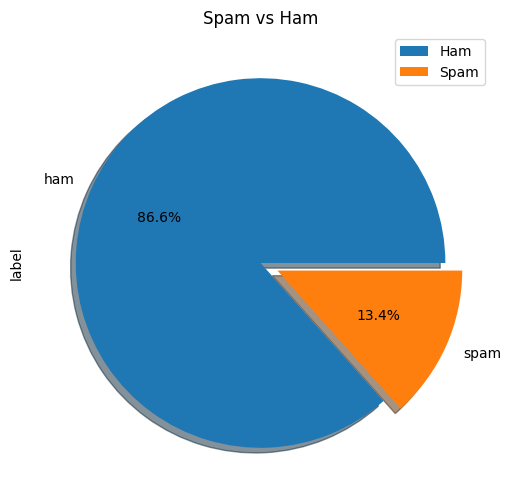

In [15]:
message["label"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
plt.title("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

Text(0, 0.5, 'Frequency')

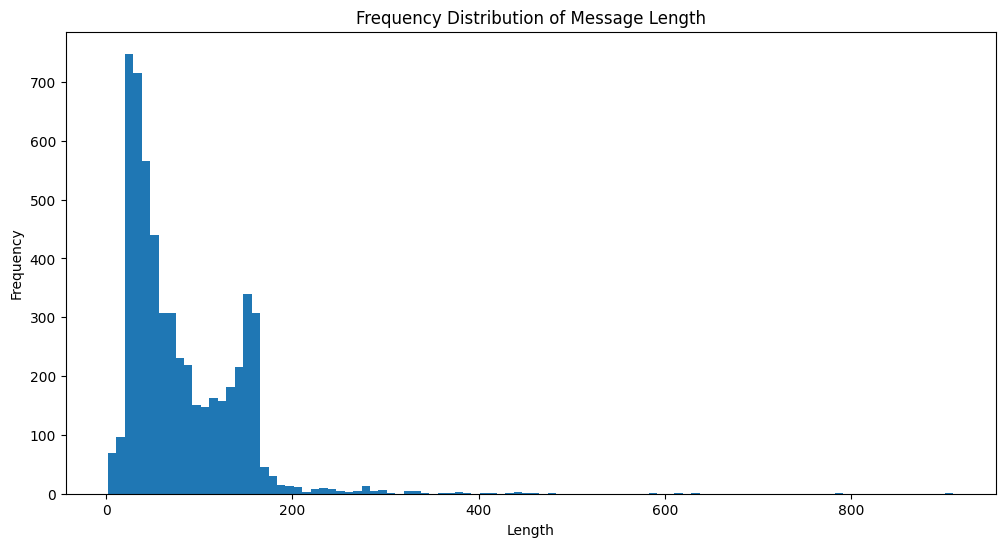

In [16]:
plt.figure(figsize=(12,6))
message['length'].plot(bins=100, kind='hist') # with 100 length bins (100 length intervals) 
plt.title("Frequency Distribution of Message Length")
plt.xlabel("Length")
plt.ylabel("Frequency")

Text(0.5, 1.0, 'Distribution of ham and spam message')

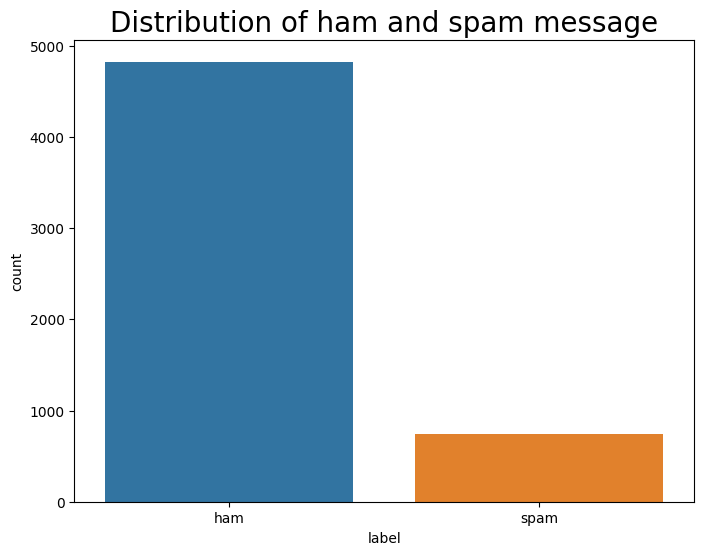

In [17]:
# we can observe imbalance data here 
plt.figure(figsize=(8,6))
ax = sns.countplot(x=message.label)
ax.set_title(label = 'Distribution of ham and spam message', fontsize = 20)

In [18]:
message['length'].describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

In [19]:
message[message['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

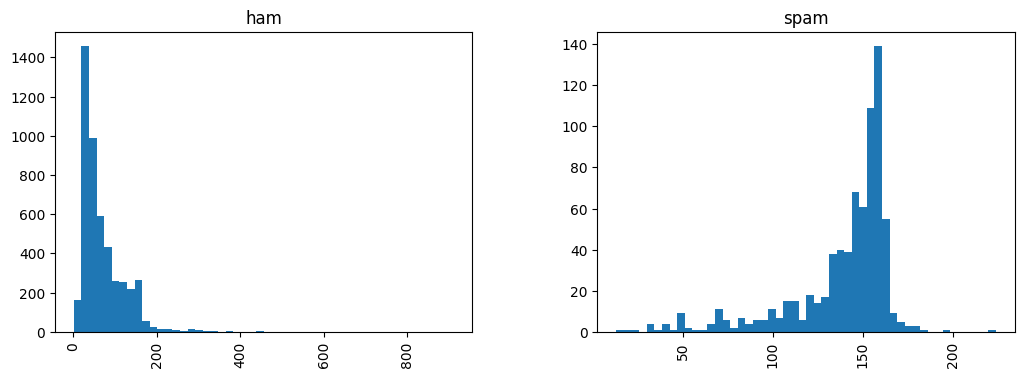

In [20]:
message.hist(column='length', by='label', bins=50,figsize=(12,4))

Spam Vs Ham

In [21]:
spam_messages = message[message["label"] == "spam"]["message"]
ham_messages = message[message["label"] == "ham"]["message"]
print("No of spam messages : ",len(spam_messages))
print("No of ham messages : ",len(ham_messages))

No of spam messages :  747
No of ham messages :  4825


In [22]:
# Percentage of spam messages
(len(spam_messages)/len(ham_messages))*100 

15.481865284974095

Text Preprocessing

In [23]:
def text_preprocess(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    nopunc = nopunc.lower()
    nostop=[word for word in nopunc.split() if word.lower() not in stopwords.words('english') and word.isalpha()]
    
    return nostop

In [24]:
import nltk
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
spam_words = text_preprocess(spam_messages)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
spam_words[:10]

['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'may']

Word Cloud For Spam Vs Ham

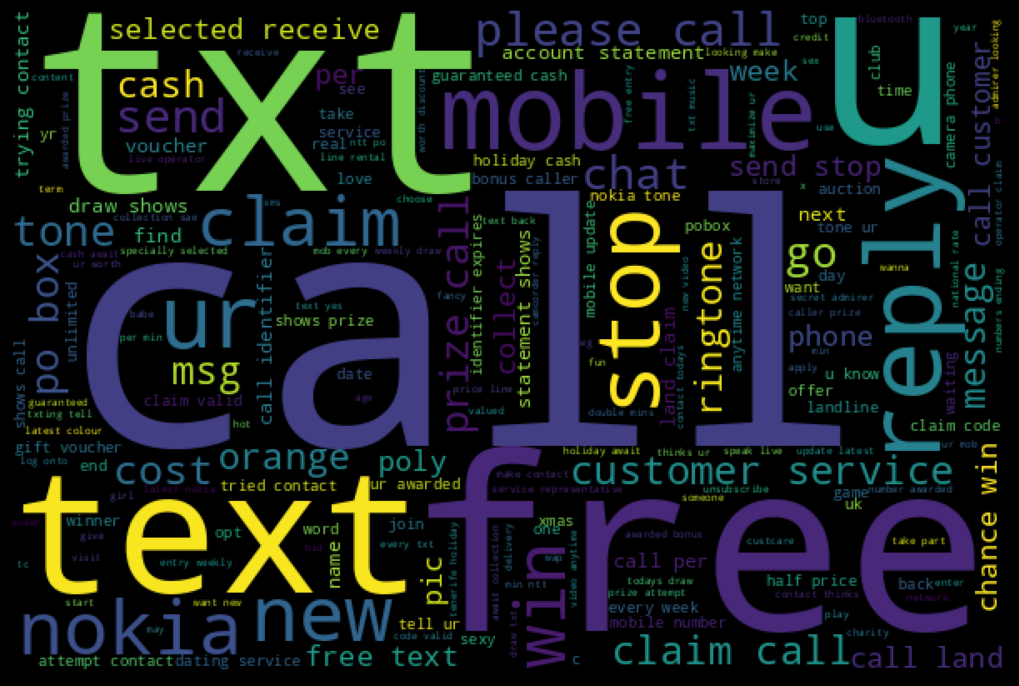

In [26]:
spam_wordcloud = WordCloud(width=600, height=400).generate(' '.join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [27]:
print("Top 10 Spam words are :\n")
print(pd.Series(spam_words).value_counts().head(10))

Top 10 Spam words are :

call      331
free      146
txt       136
ur        129
mobile    108
text      107
claim     105
u          98
reply      98
stop       78
dtype: int64


In [28]:
ham_words = text_preprocess(ham_messages)

In [29]:
ham_words[:10]

['go',
 'jurong',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'cine']

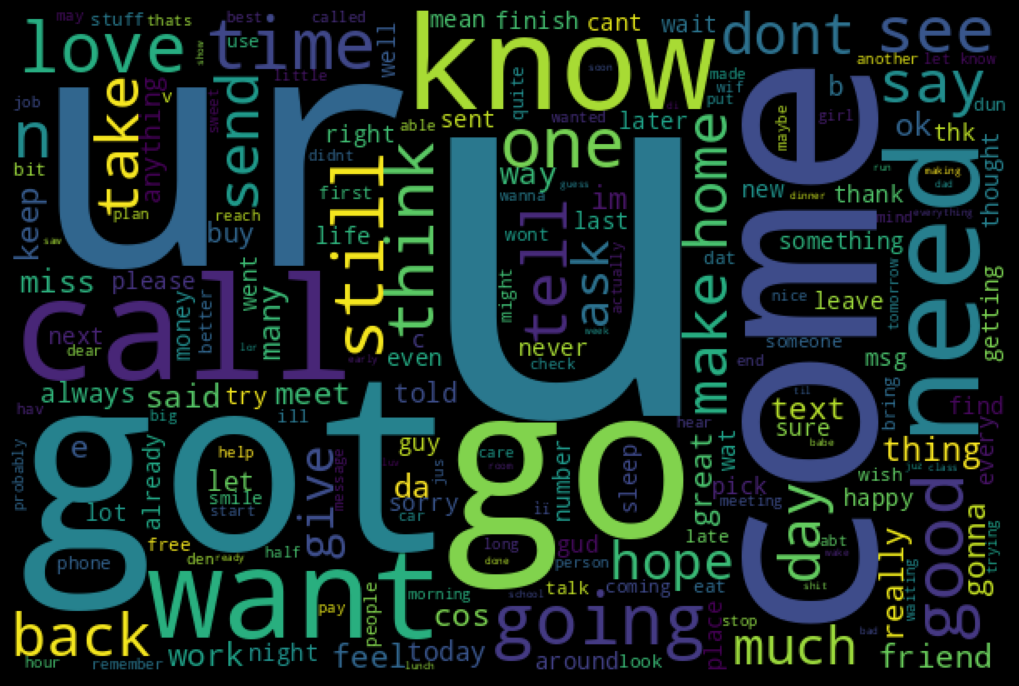

In [30]:
ham_wordcloud = WordCloud(width=600, height=400).generate(' '.join(ham_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [31]:
print("Top 10 Ham words are :\n")
print(pd.Series(ham_words).value_counts().head(10))

Top 10 Ham words are :

u        820
get      287
ur       235
go       231
got      216
like     215
know     202
come     201
call     200
going    151
dtype: int64


In [32]:
message['label'] = message['label'].map({'ham': 0, 'spam': 1})

Train and Test Data

In [33]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(message, test_size=0.2, random_state=42)

Tokenization


The Tokenizer API from TensorFlow Keras splits sentences into words and encodes these into integers.

In [34]:
# Tokenize the texts
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['message'])

Sequencing and Padding

After tokenization, we represent each sentence by sequences of numbers using texts_to_sequences() from tokenizer object. Subsequently, we use pad_sequences() so that each sequence will have same length. Sequencing and padding are done for both training and testing data.



In [35]:
train_sequences = tokenizer.texts_to_sequences(train_data['message'])
test_sequences = tokenizer.texts_to_sequences(test_data['message'])

In [36]:
# Get the maximum sequence length
max_len = max([len(x) for x in train_sequences])
print(max_len)

121


In [37]:
# Pad the sequences
training_padded = pad_sequences(train_sequences, maxlen=max_len, padding='post', truncating='post')
testing_padded = pad_sequences(test_sequences, maxlen=max_len, padding='post', truncating='post')

In [38]:
# Shape of train tensor
print('Shape of training tensor: ', training_padded.shape)
print('Shape of testing tensor: ', testing_padded.shape)

Shape of training tensor:  (4457, 121)
Shape of testing tensor:  (1115, 121)


In [39]:
# Before padding
len(train_sequences[0]), len(train_sequences[1])

(19, 23)

In [40]:
# After padding
len(training_padded[0]), len(training_padded[1])

(121, 121)

In [41]:
print(training_padded[0])

[  38   30    8    5  273 1989   81  116   26   11 1656  322   10   53
   18  299   30  349 1990    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0]


In [42]:
# Before padding
len(test_sequences[0]), len(test_sequences[1])

(17, 38)

In [43]:
# After padding
len(testing_padded[0]), len(testing_padded[1])

(121, 121)

In [44]:
print(testing_padded[0])

[1366 1578 1432   19 7893   19   19   38  118 1650   19  738    4  449
 3023   35 1285    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0]


#DEEP LEARNING MODELS


Dense Spam Detection Model


In [45]:
# Create the model
vocab_size = len(tokenizer.word_index) + 1
embeding_dim = 50
n_lstm = 50
drop_lstm = 0.2

# Model architecture
model = Sequential()
model.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = model.fit(training_padded, train_data['label'], epochs=num_epochs, validation_data=(testing_padded, test_data['label']),callbacks=[early_stop], verbose=2)

Epoch 1/30
140/140 - 3s - loss: 0.4398 - accuracy: 0.8686 - val_loss: 0.3786 - val_accuracy: 0.8738 - 3s/epoch - 18ms/step
Epoch 2/30
140/140 - 1s - loss: 0.3707 - accuracy: 0.8775 - val_loss: 0.3714 - val_accuracy: 0.8759 - 1s/epoch - 9ms/step
Epoch 3/30
140/140 - 1s - loss: 0.3645 - accuracy: 0.8790 - val_loss: 0.3689 - val_accuracy: 0.8757 - 1s/epoch - 10ms/step
Epoch 4/30
140/140 - 2s - loss: 0.3621 - accuracy: 0.8789 - val_loss: 0.3687 - val_accuracy: 0.8756 - 2s/epoch - 14ms/step
Epoch 5/30
140/140 - 2s - loss: 0.3607 - accuracy: 0.8789 - val_loss: 0.3681 - val_accuracy: 0.8759 - 2s/epoch - 11ms/step
Epoch 6/30
140/140 - 2s - loss: 0.3610 - accuracy: 0.8790 - val_loss: 0.3681 - val_accuracy: 0.8760 - 2s/epoch - 11ms/step
Epoch 7/30
140/140 - 1s - loss: 0.3596 - accuracy: 0.8790 - val_loss: 0.3680 - val_accuracy: 0.8758 - 1s/epoch - 10ms/step
Epoch 8/30
140/140 - 1s - loss: 0.3602 - accuracy: 0.8790 - val_loss: 0.3680 - val_accuracy: 0.8759 - 1s/epoch - 9ms/step
Epoch 9/30
140/140

The model resulted with training loss 0.35,traning accuracy 87.89%, validation loss of 0.36 and validation accuracy 87.59%

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 121, 50)           397750    
                                                                 
 dense (Dense)               (None, 121, 32)           1632      
                                                                 
 dense_1 (Dense)             (None, 121, 1)            33        
                                                                 
Total params: 399,415
Trainable params: 399,415
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Read as a dataframe 
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

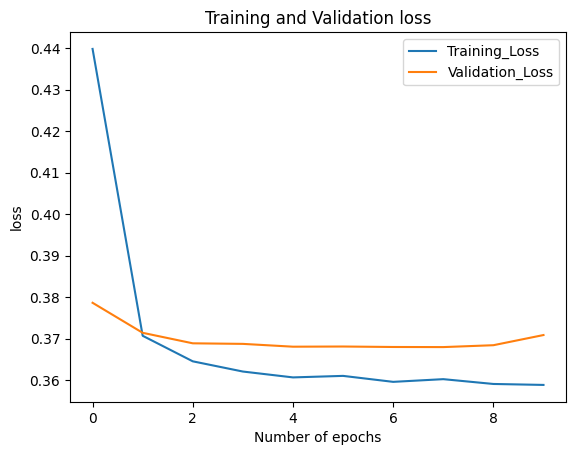

In [48]:
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')

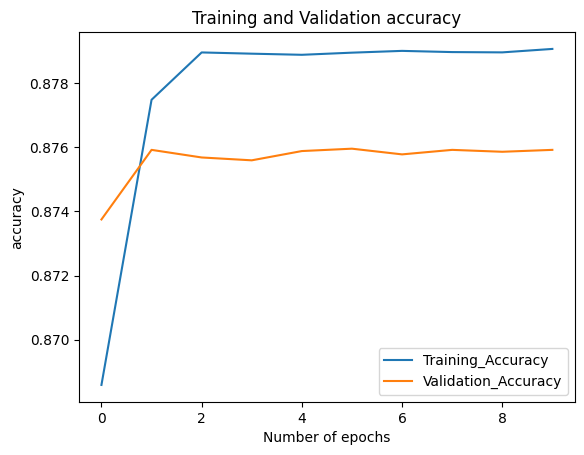

In [49]:
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

Long Short Term Memory LSTM 

In [50]:
# Create the LSTM model
model1 = Sequential()
model1.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model1.add(LSTM(n_lstm, dropout=drop_lstm))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the LSTM model
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = model1.fit(training_padded, train_data['label'], epochs=num_epochs, 
                    validation_data=(testing_padded, test_data['label']), callbacks=[early_stop], verbose=2)




Epoch 1/30
140/140 - 16s - loss: 0.4167 - accuracy: 0.8620 - val_loss: 0.3966 - val_accuracy: 0.8655 - 16s/epoch - 111ms/step
Epoch 2/30
140/140 - 10s - loss: 0.3958 - accuracy: 0.8661 - val_loss: 0.3952 - val_accuracy: 0.8655 - 10s/epoch - 74ms/step
Epoch 3/30
140/140 - 11s - loss: 0.3949 - accuracy: 0.8661 - val_loss: 0.3959 - val_accuracy: 0.8655 - 11s/epoch - 79ms/step
Epoch 4/30
140/140 - 11s - loss: 0.3957 - accuracy: 0.8661 - val_loss: 0.3959 - val_accuracy: 0.8655 - 11s/epoch - 81ms/step


The model resulted with training loss 0.39,traning accuracy 86.62%, validation loss of 0.39 and validation accuracy 86:55%

In [63]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 121, 50)           397750    
                                                                 
 lstm (LSTM)                 (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 418,001
Trainable params: 418,001
Non-trainable params: 0
_________________________________________________________________


In [51]:
# Create a dataframe
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('LSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

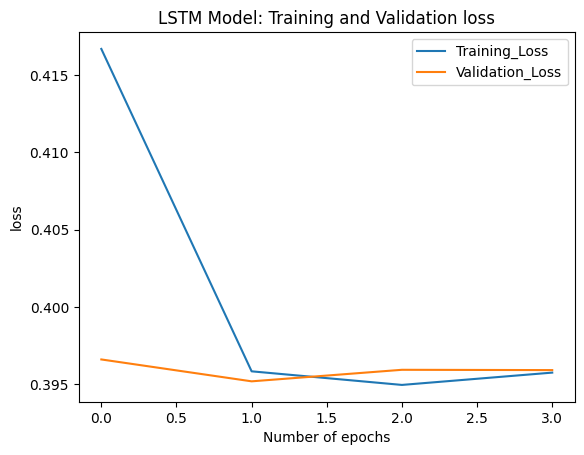

In [52]:
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')

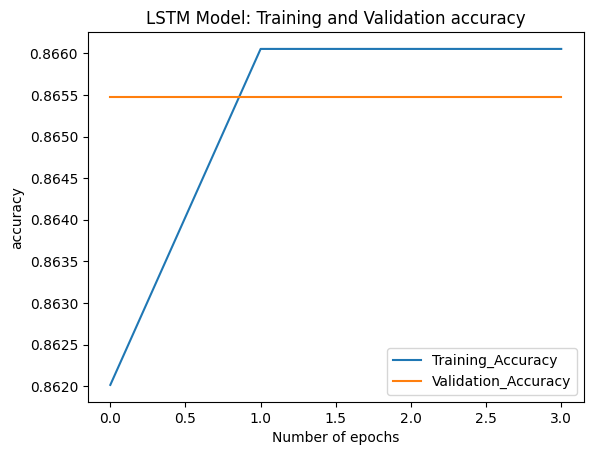

In [53]:
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

Bidirectional LSTM model

In [54]:
# Create the Bidirectional LSTM model
model2 = Sequential()
model2.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model2.add(Bidirectional(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True)))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the Bidirectional LSTM model
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = model2.fit(training_padded, train_data['label'], epochs=num_epochs, 
                    validation_data=(testing_padded, test_data['label']), callbacks=[early_stop], verbose=2)



Epoch 1/30
140/140 - 26s - loss: 0.3544 - accuracy: 0.8825 - val_loss: 0.1580 - val_accuracy: 0.9650 - 26s/epoch - 188ms/step
Epoch 2/30
140/140 - 23s - loss: 0.0892 - accuracy: 0.9819 - val_loss: 0.0892 - val_accuracy: 0.9817 - 23s/epoch - 163ms/step
Epoch 3/30
140/140 - 20s - loss: 0.0389 - accuracy: 0.9935 - val_loss: 0.0872 - val_accuracy: 0.9838 - 20s/epoch - 144ms/step
Epoch 4/30
140/140 - 19s - loss: 0.0264 - accuracy: 0.9957 - val_loss: 0.0878 - val_accuracy: 0.9853 - 19s/epoch - 139ms/step
Epoch 5/30
140/140 - 20s - loss: 0.0136 - accuracy: 0.9981 - val_loss: 0.1118 - val_accuracy: 0.9817 - 20s/epoch - 145ms/step


The model resulted with training loss 0.34,traning accuracy 98.33%, validation loss of 0.06 and validation accuracy 98.71%

In [64]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 121, 50)           397750    
                                                                 
 bidirectional (Bidirectiona  (None, 121, 100)         40400     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 121, 1)            101       
                                                                 
Total params: 438,251
Trainable params: 438,251
Non-trainable params: 0
_________________________________________________________________


In [55]:
# Create a dataframe
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('BiLSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])


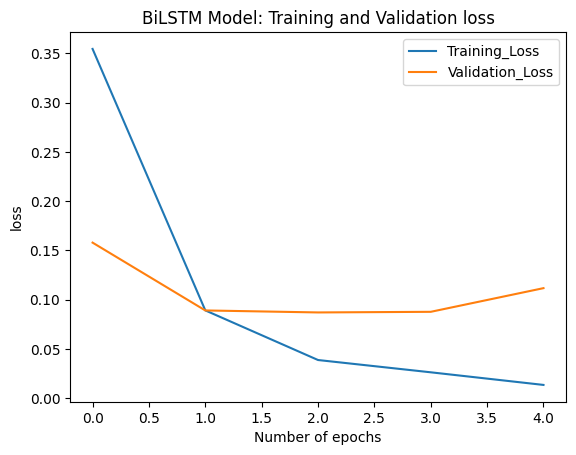

In [56]:
# Plot
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')


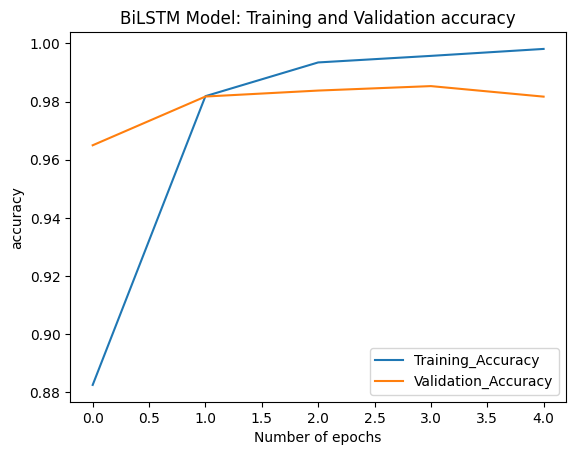

In [57]:
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

Compare the three models


In [58]:
print(f"Dense architecture loss and accuracy: {model.evaluate(testing_padded, test_data['label'])}")
print(f"LSTM architecture loss and accuracy: {model1.evaluate(testing_padded, test_data['label'])}")
print(f"Bidirectional LSTM architecture loss and accuracy: {model2.evaluate(testing_padded, test_data['label'])}")

35/35 [==============================] - 0s 3ms/step - loss: 0.3709 - accuracy: 0.8759
Dense architecture loss and accuracy: [0.3708604872226715, 0.875921905040741]
35/35 [==============================] - 1s 20ms/step - loss: 0.3959 - accuracy: 0.8655
LSTM architecture loss and accuracy: [0.3959069848060608, 0.865470826625824]
35/35 [==============================] - 1s 33ms/step - loss: 0.1118 - accuracy: 0.9817
Bidirectional LSTM architecture loss and accuracy: [0.11179165542125702, 0.9816920757293701]


Comparing the three model Bi LSTM shows highest accuarcy about 98.71% followed by Dense with an accuracy 87.59% and in end we have LSTM with accuracy 86.55%

Predict spam/ham on new messages

Scenario 1: Using raw text from our data

In [59]:
# display long string 
pd.options.display.max_colwidth=100
message[:3]

,label,message,length
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,155


In [60]:
predict_msg = ["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",
          "Ok lar... Joking wif u oni...",
          "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]

In [61]:
# Defining prediction function
def predict_spam(predict_msg):
    padding_type = "post"
    trunc_type = "post"
    new_seq = tokenizer.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen=max_len,
                            padding=padding_type,
                            truncating=trunc_type)
    return model.predict(padded)

predict_spam(predict_msg)

1/1 [==============================] - 0s 148ms/step


array([[[0.1093167 ],
        [0.10492894],
        [0.06071988],
        [0.00487557],
        [0.21723318],
        [0.19934702],
        [0.3898837 ],
        [0.07509812],
        [0.01043055],
        [0.07321269],
        [0.11065989],
        [0.02672965],
        [0.00680719],
        [0.14770573],
        [0.02221266],
        [0.00871266],
        [0.05750688],
        [0.02500566],
        [0.04171444],
        [0.00977041],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0

Scenario 2: Using newly created text message and see how the model classifies them.

In [62]:
# The third one gives 0.99 indicating very high probabilty of spam
predict_msg = ["You are awarded a Nikon Digital Camera. Call now",
               "Call me",
          "What's up?"]
predict_spam(predict_msg)


1/1 [==============================] - 0s 24ms/step


array([[[0.10468337],
        [0.15912166],
        [0.9990577 ],
        [0.22178683],
        [0.99741906],
        [0.94747645],
        [0.51397383],
        [0.4018621 ],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0.10024718],
        [0